In [1]:
import numpy as np
import pandas as pd
import os
os.chdir('../../data/GosaiMPRA')

import sys
sys.path.append('/home/hxcai/cell_type_specific_CRE')

import utils as utils
from utils import *

mpl_params = {
    # 图像参数
    'figure.dpi': 100,
    'figure.figsize': (6, 4.5),
}
plt.rcParams.update(mpl_params)

In [2]:
df = pd.read_csv('GosaiMPRA_len200.csv', sep='\t')
df

,seq,chr,HepG2,K562,SKNSH
0,CCTGGTCTTTCTTGCTAAATAAACATATCGTGCATCATCCAGATCT...,chr7,0.233601,0.060779,0.047194
1,CATAAAGATGAGGCTTGGCAAAGAACATCTCTCGGTGCCTCCCATT...,chr1,0.004565,0.379639,-0.244395
2,CATAAAGCCAATCACTGAGATGACAAGTACTGCCAGGAAAGAAGGC...,chr1,0.384537,0.036707,-0.004578
3,CATAAAGGCAGTGTAGACCCAAACAGTGAGCAGTAGCAAGATTTAT...,chr15,4.116494,4.508784,3.040183
4,CATAAAGGGCTGAACATGCTGTTGAAAAAATGTAGATATAAAAGTT...,chr12,1.423444,1.616602,1.335892
...,...,...,...,...,...
763678,CAGTAGTAAGAAAGAGACAATGCAAAGGAATTGGCACAGCACTCAG...,chr4,5.344297,7.443810,6.585129
763679,CAGTACTGCTGGCCCCAGAAAAGCCCCTCTCCTTATACCCTAGGCC...,chr18,-0.156933,-0.204913,-0.209358
763680,CAGTACCTTGTCCCCACTTCCCATTTGGCCTCTGGCAGAGGAGGAG...,chr12,0.613623,1.218233,0.569894
763681,CAGTACACCCCAGCTTCCAAAGGCCTTCTGTGACAAAGAGAGACTA...,chr3,-0.338764,-0.222234,-0.817852


pearsonr = 0.797


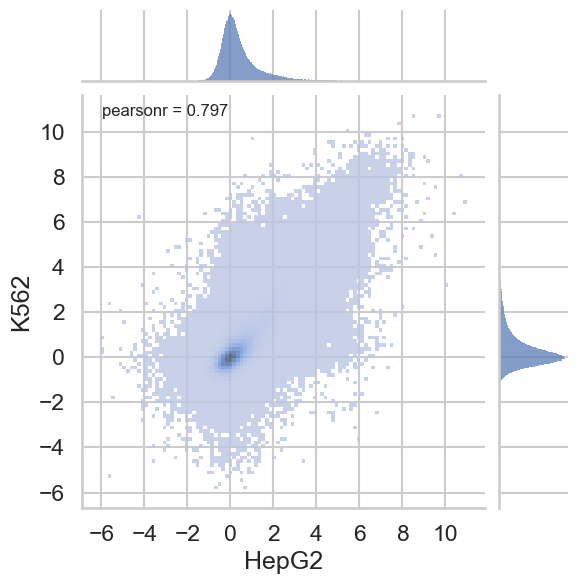

In [3]:
r = pearsonr(df['HepG2'], df['K562'])[0]
print(f'pearsonr = {r:.3f}')

g = sns.jointplot(x=df['HepG2'], y=df['K562'], kind='hist', bins=100, alpha=0.8)

# 调整主图的网格间距
g.ax_joint.xaxis.set_major_locator(plt.MultipleLocator(2))
g.ax_joint.yaxis.set_major_locator(plt.MultipleLocator(2))
plt.text(0.05, 0.95, f'pearsonr = {r:.3f}', transform=g.ax_joint.transAxes)

plt.savefig('GosaiMPRA_HepG2_K562.png', dpi=400)
# plt.figure(figsize=(6, 4.5), dpi=100)
# sns.scatterplot(x=df['HepG2'][:10000], y=df['K562'][:10000], s=1)
# print(pearsonr(df['HepG2'][:10000], df['K562'][:10000]))

In [6]:
df['K562_exp_no'] = (df['K562'] > -0.5) & (df['K562'] < 0.5)
df['K562_exp_yes'] = (df['K562'] > 1)

print(df['K562_exp_no'].sum(), df['K562_exp_yes'].sum())

n = 150000
df0 = df[df['K562_exp_no']].sample(n=n, replace=True, random_state=42)
df1 = df[df['K562_exp_yes']].sample(n=n, replace=True, random_state=42)

df_subset = pd.concat([df0, df1])
df_subset.to_csv('GosaiMPRA_subset_K562_exp>1_<0.5_balanced_300k.csv', index=False)

455575 152657


In [9]:
df['HepG2_b'] = (df['HepG2'] > 1).astype(int)
df['K562_b']  = (df['K562'] > 1).astype(int)
print(df['HepG2_b'].sum(), df['K562_b'].sum())

# filtered_index = df['HepG2_b'] | df['K562_b']
# filtered_df = df[filtered_index.astype(bool)]
# print(filtered_df.shape)

151785 152657


In [10]:
df11 = df[(df['HepG2_b'] & df['K562_b']).astype(bool)]
df10 = df[(df['HepG2_b'] & ~df['K562_b']).astype(bool)]
df01 = df[(~df['HepG2_b'] & df['K562_b']).astype(bool)]
df00 = df[(~df['HepG2_b'] & ~df['K562_b']).astype(bool)]
print(len(df11), len(df10), len(df01), len(df00))

108125 43660 44532 763683


In [11]:
n = 40000

df11 = df11.sample(n=n, replace=True, random_state=42)
df10 = df10.sample(n=n, replace=True, random_state=42)
df01 = df01.sample(n=n, replace=True, random_state=42)
df00 = df00.sample(n=n, replace=True, random_state=42)

In [12]:
s_df = pd.concat([df11, df10, df01, df00])
s_df.to_csv('GosaiMPRA_subset_exp>1_balanced_160k.csv', sep='\t', index=False)

In [13]:
# # plt.figure(figsize=(6, 4.5), dpi=100)
# # sns.scatterplot(x=filtered_df['HepG2'], y=filtered_df['K562'], s=1)
# print(pearsonr(filtered_df['HepG2'], filtered_df['K562']))
# g = sns.jointplot(x=filtered_df['HepG2'], y=filtered_df['K562'], kind='hist', bins=100, alpha=0.8)

In [14]:
df['HepG2_specific'] = ((df['HepG2'] - df['K562']) > 1).astype(int)
df['K562_specific']  = ((df['K562'] - df['HepG2']) > 1).astype(int)
print(df['HepG2_specific'].sum(), df['K562_specific'].sum())

filtered_index = df['HepG2_specific'] | df['K562_specific']
filtered_df = df[filtered_index.astype(bool)]
print(filtered_df.shape)
filtered_df.to_csv('GosaiMPRA_subset_specific>1.csv', index=False, sep='\t')

38194 53342
(91536, 9)


pearsonr = 0.541


Text(0.05, 0.95, 'pearsonr = 0.541')

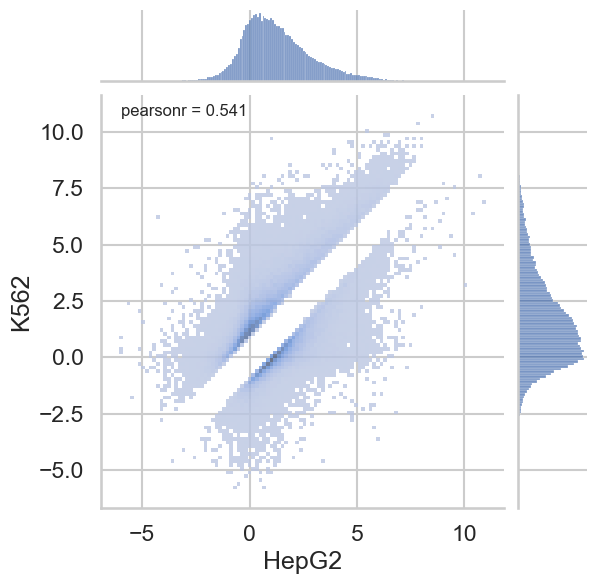

In [15]:
r = pearsonr(filtered_df['HepG2'], filtered_df['K562'])[0]
print(f'pearsonr = {r:.3f}')
g = sns.jointplot(x=filtered_df['HepG2'], y=filtered_df['K562'], kind='hist', bins=100, alpha=0.8)
plt.text(0.05, 0.95, f'pearsonr = {r:.3f}', transform=g.ax_joint.transAxes)

In [16]:
df['HepG2_specific'] = ((df['HepG2'] - df['K562']) > 2).astype(int)
df['K562_specific']  = ((df['K562'] - df['HepG2']) > 2).astype(int)
print(df['HepG2_specific'].sum(), df['K562_specific'].sum())

filtered_index = df['HepG2_specific'] | df['K562_specific']
filtered_df = df[filtered_index.astype(bool)]
print(filtered_df.shape)
filtered_df.to_csv('GosaiMPRA_subset_specific>2.csv', index=False, sep='\t')

7034 11611
(18645, 9)


pearsonr = 0.173


Text(0.05, 0.95, 'pearsonr = 0.173')

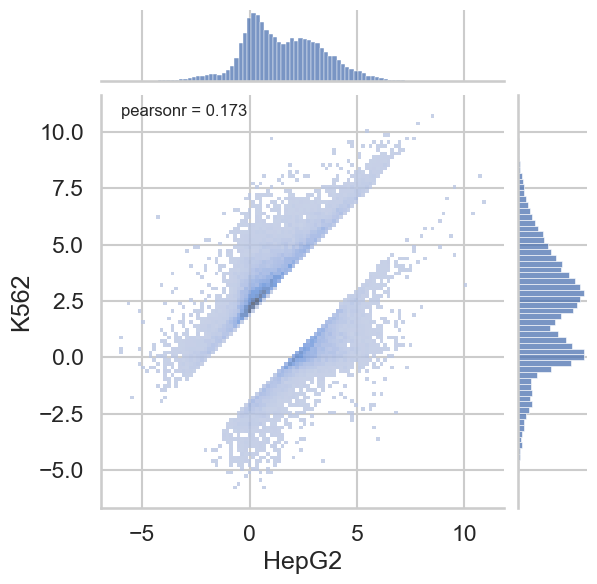

In [17]:
r = pearsonr(filtered_df['HepG2'], filtered_df['K562'])[0]
print(f'pearsonr = {r:.3f}')
g = sns.jointplot(x=filtered_df['HepG2'], y=filtered_df['K562'], kind='hist', bins=100, alpha=0.8)
plt.text(0.05, 0.95, f'pearsonr = {r:.3f}', transform=g.ax_joint.transAxes)

PearsonRResult(statistic=0.1727196742684022, pvalue=8.356547911793094e-125)


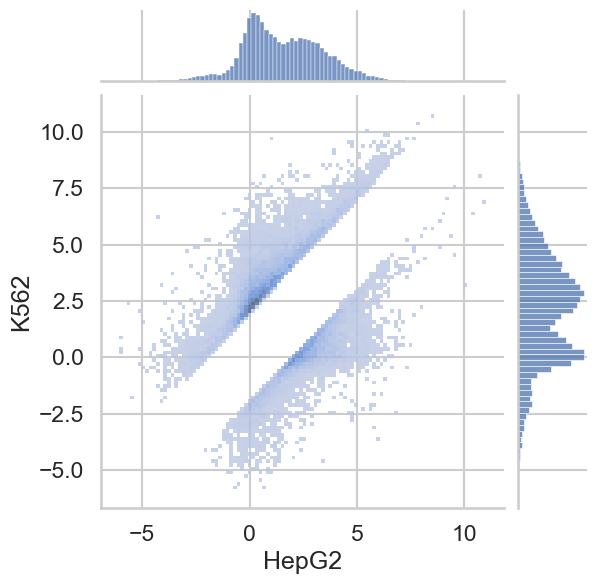

In [18]:
print(pearsonr(filtered_df['HepG2'], filtered_df['K562']))
g = sns.jointplot(x=filtered_df['HepG2'], y=filtered_df['K562'], kind='hist', bins=100, alpha=0.8)

In [19]:
df['HepG2_b'] = (df['HepG2'] > 0.5)
df['K562_b']  = (df['K562'] > 0.5)
df['SKNSH_b'] = (df['SKNSH'] > 0.5)
print(df['HepG2_b'].sum(), df['K562_b'].sum(), df['SKNSH_b'].sum())

filtered_index = df['HepG2_b'] | df['K562_b'] | df['SKNSH_b']

double_sampled_df = df[filtered_index].sample(frac=2, replace=True, random_state=1)
single_sampled_df = df[~filtered_index]

filtered_df = pd.concat([double_sampled_df, single_sampled_df])
filtered_df.to_csv('GosaiMPRA_upsampled_0.5*2.csv', index=False)
print(filtered_df.shape)

261148 250552 259528


PearsonRResult(statistic=0.7859980901708848, pvalue=0.0)


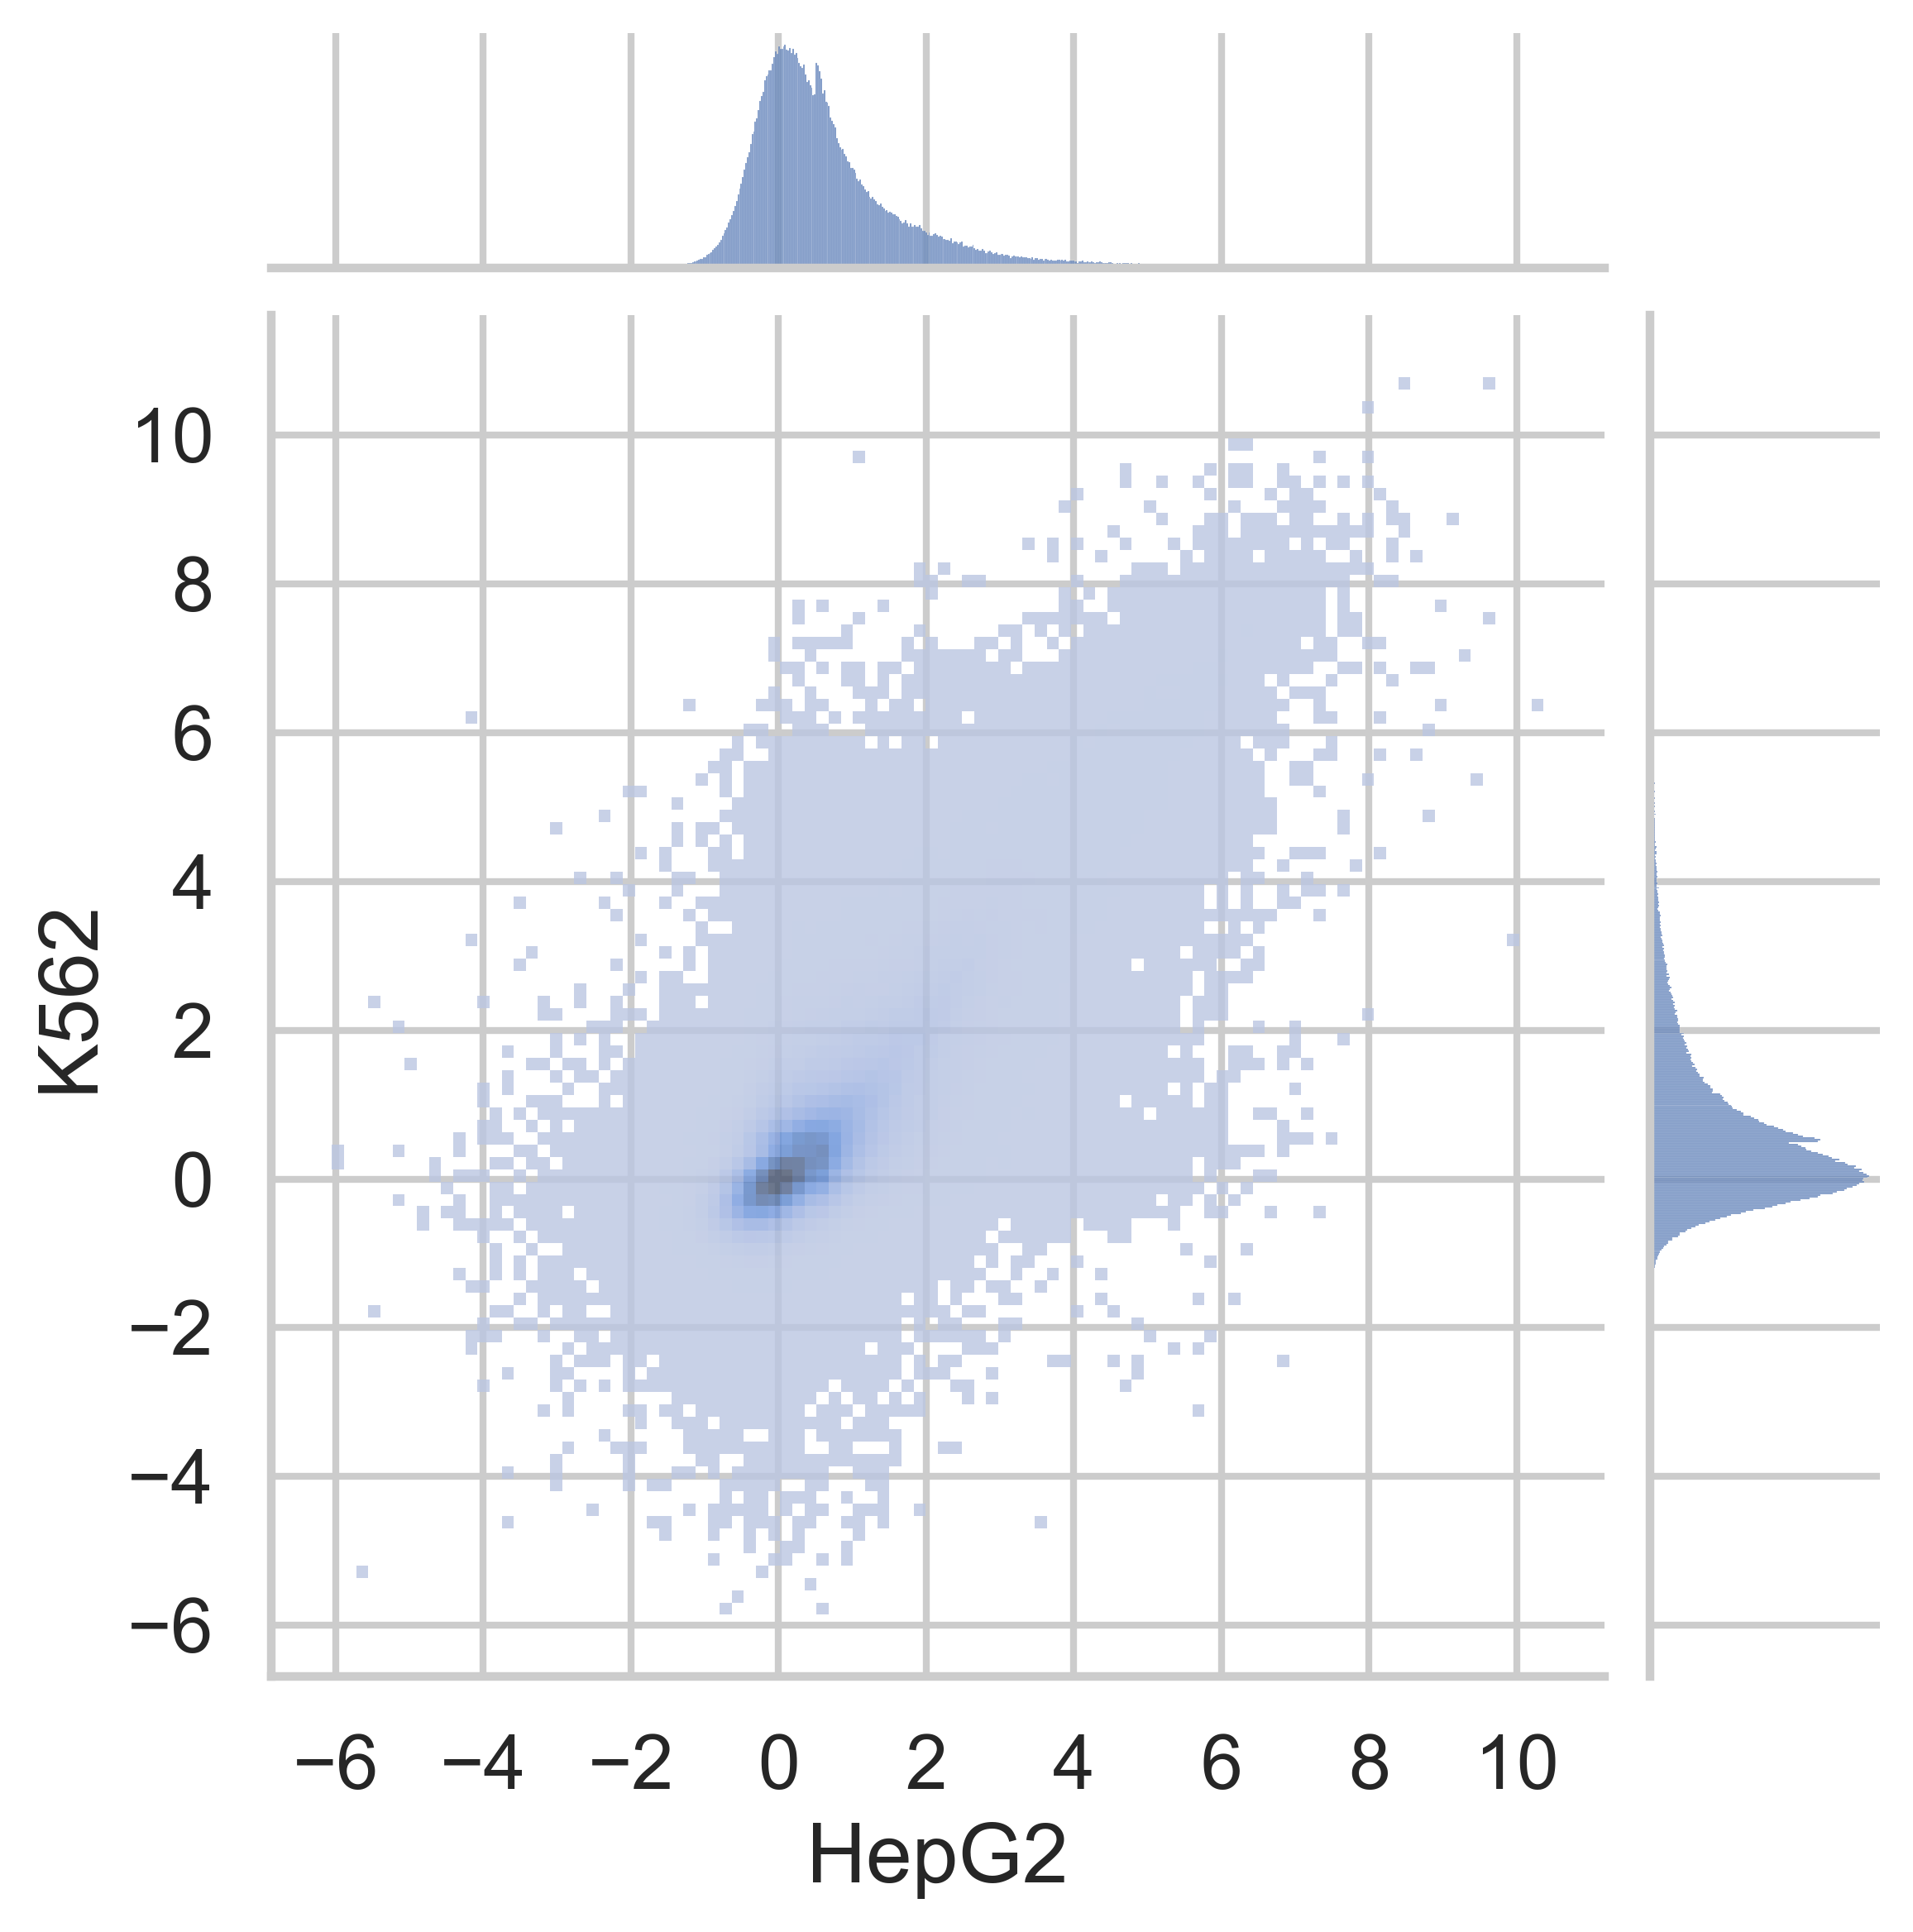

In [44]:
print(pearsonr(filtered_df['HepG2'], filtered_df['K562']))
g = sns.jointplot(x=filtered_df['HepG2'], y=filtered_df['K562'], kind='hist', bins=100, alpha=0.8)
g.ax_joint.xaxis.set_major_locator(plt.MultipleLocator(2))
g.ax_joint.yaxis.set_major_locator(plt.MultipleLocator(2))
plt.savefig('GosaiMPRA_upsampled_corr.png', dpi=400)

In [24]:
# data = df[['HepG2', 'K562', 'SKNSH']].to_numpy()
# mean = data.mean()
# std = data.std() + 1e-6
# data = (data - mean) / std
# df[['HepG2', 'K562', 'SKNSH']] = data

In [25]:
# plt.figure(figsize=(6, 4.5), dpi=100)
# sns.scatterplot(x=filtered_df['HepG2'], y=filtered_df['K562'], s=1)
# print(pearsonr(filtered_df['HepG2'], filtered_df['K562']))

In [45]:
filtered_index = (df['HepG2'] - df['K562']).abs() > 1
filtered_df = df[filtered_index]
print(filtered_df.shape)

(91536, 10)


PearsonRResult(statistic=0.5407281265614425, pvalue=0.0)


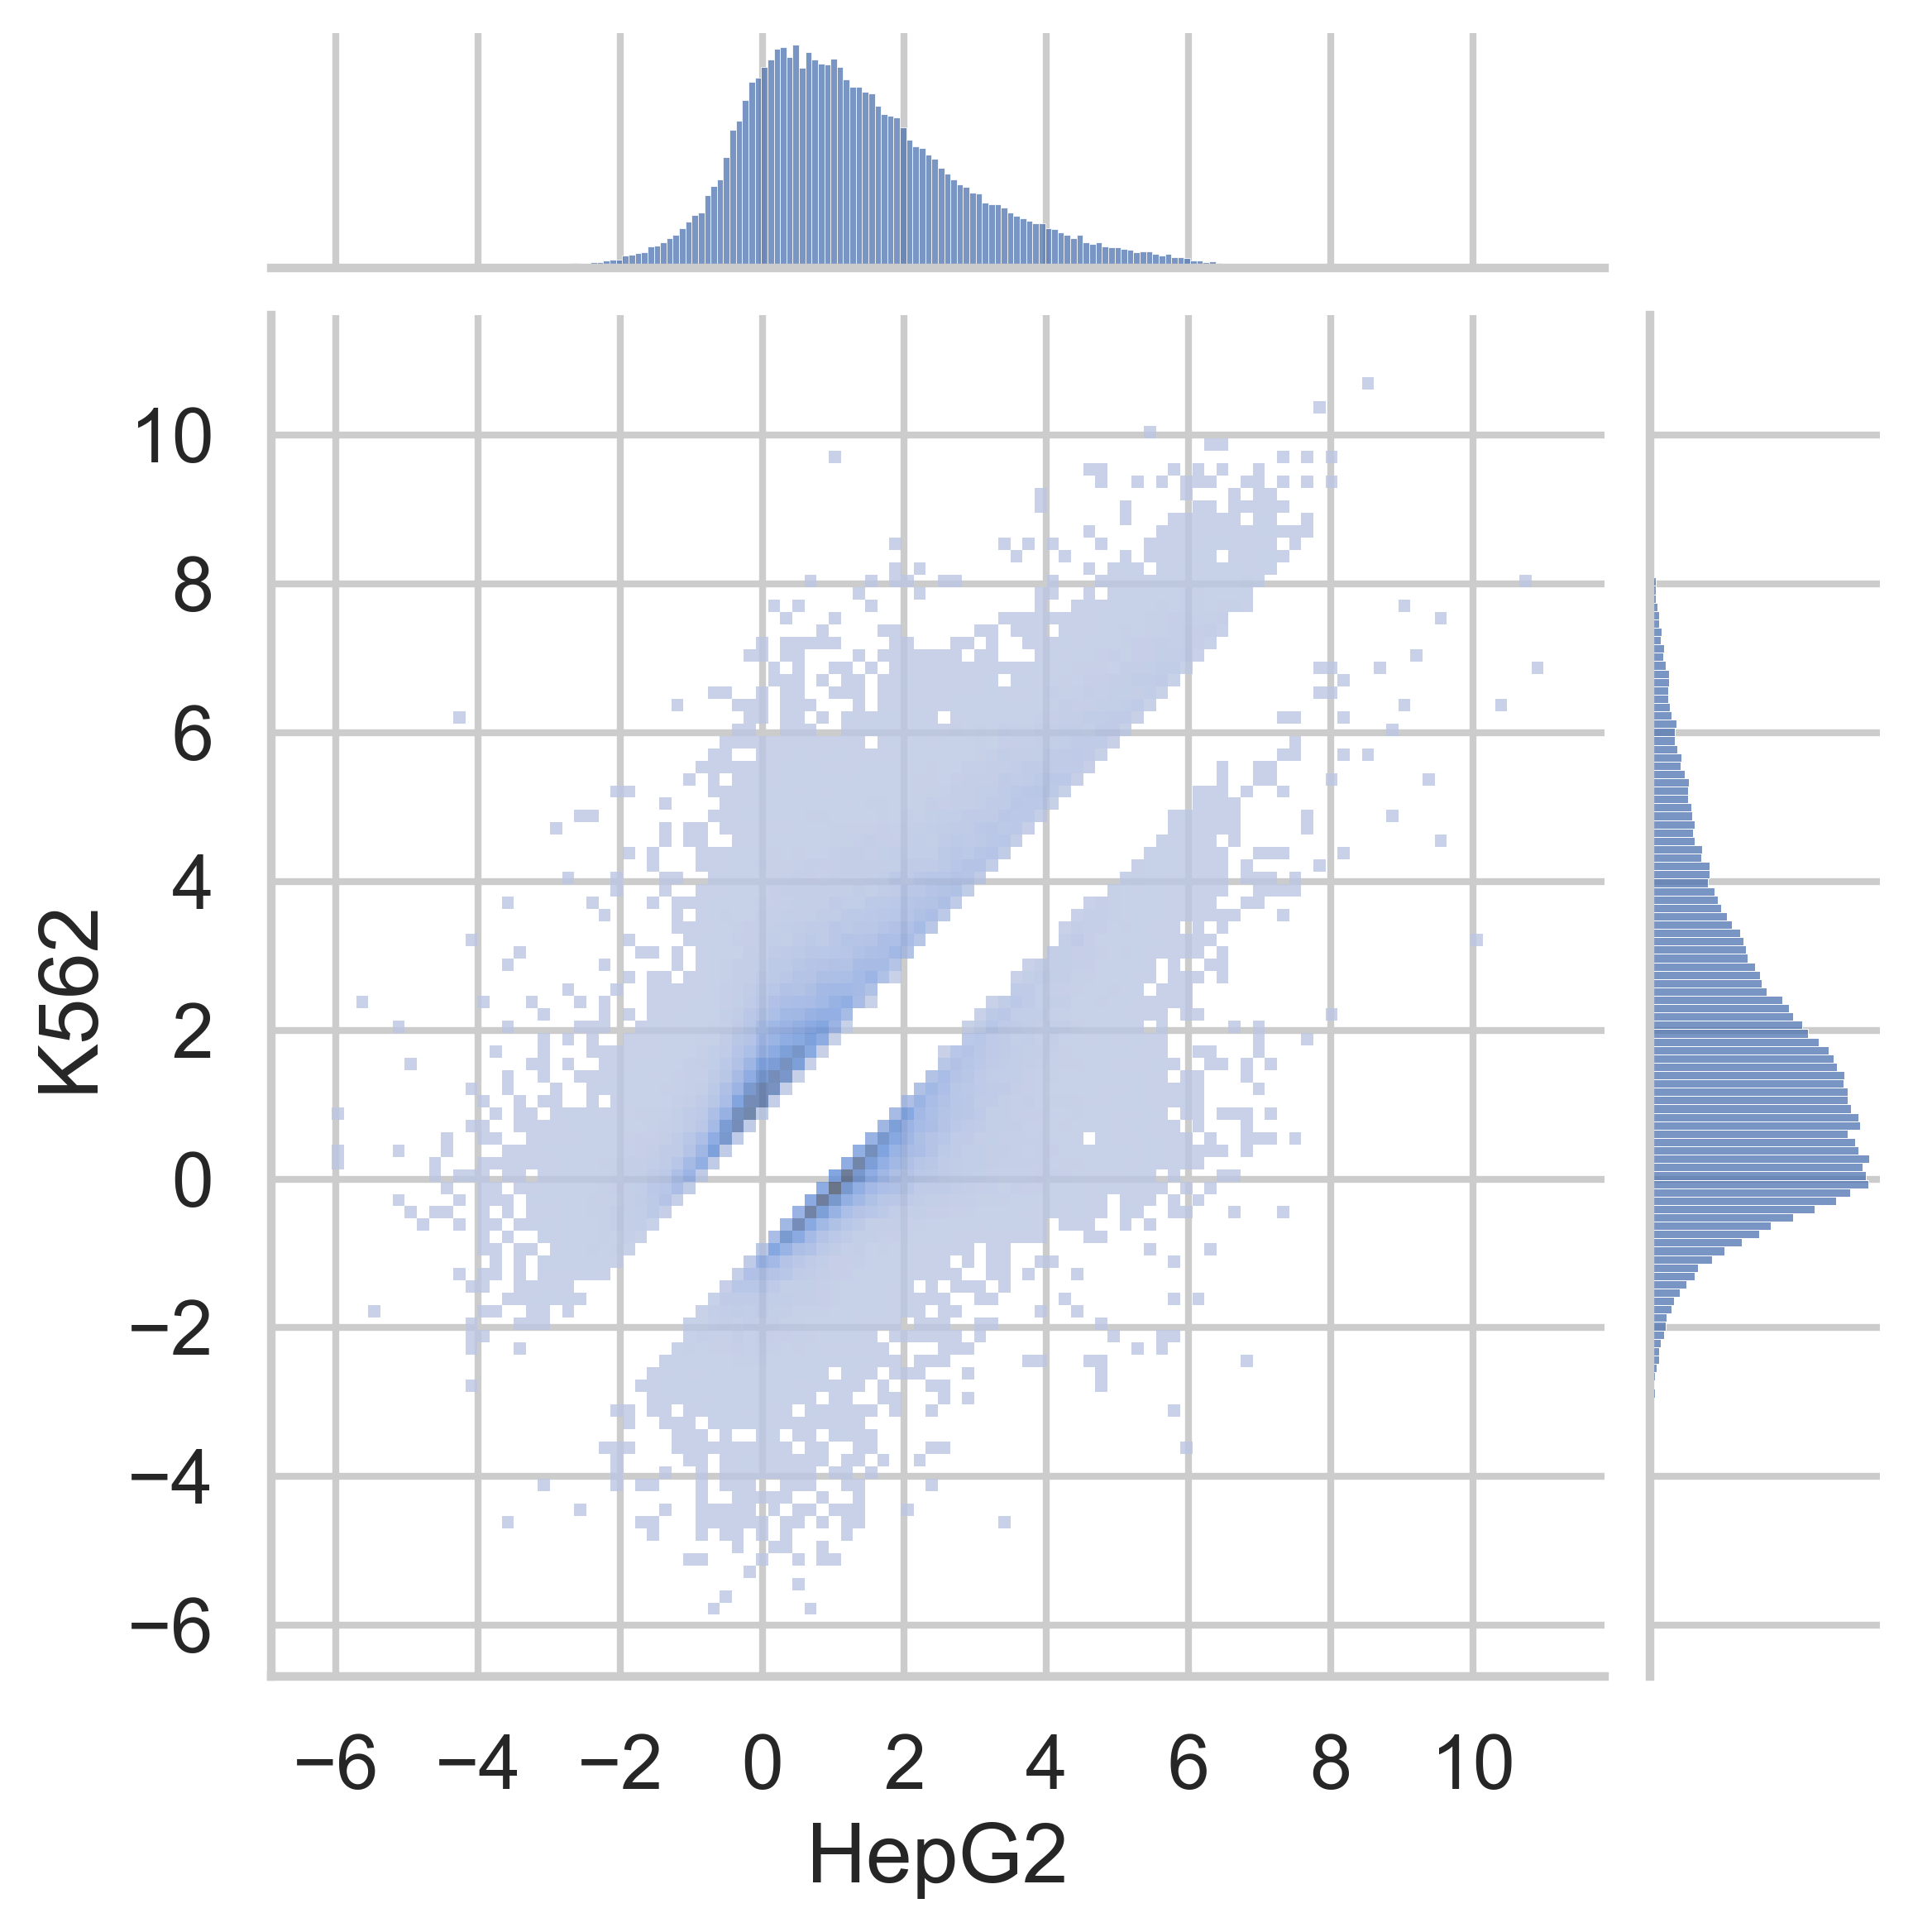

In [46]:
print(pearsonr(filtered_df['HepG2'], filtered_df['K562']))
g = sns.jointplot(x=filtered_df['HepG2'], y=filtered_df['K562'], kind='hist', bins=100, alpha=0.8)
g.ax_joint.xaxis.set_major_locator(plt.MultipleLocator(2))
g.ax_joint.yaxis.set_major_locator(plt.MultipleLocator(2))
plt.savefig('GosaiMPRA_diff1_corr.png', dpi=400)

In [30]:
filtered_df.to_csv('GosaiMPRA_diff>1.csv', index=False)